In [4]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, AffinityPropagation
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.svm import SVC
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
import seaborn as sns


In [5]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
wine = fetch_ucirepo(id=109) 
  
# data (as pandas dataframes) 
X = wine.data.features 
y = wine.data.targets 
  
# metadata 
print(wine.metadata) 
  
# variable information 
print(wine.variables) 

wine_df = pd.DataFrame(data=wine.data.features, columns=wine.metadata.features)
target_df = pd.DataFrame(data=wine.data.targets, columns=wine.metadata.targets)
wine_with_target = pd.concat([wine_df, target_df], axis=1)

print(wine_df.head()) # типы данных указаны в type
print(wine_df.shape) # количетсво семплов

{'uci_id': 109, 'name': 'Wine', 'repository_url': 'https://archive.ics.uci.edu/dataset/109/wine', 'data_url': 'https://archive.ics.uci.edu/static/public/109/data.csv', 'abstract': 'Using chemical analysis to determine the origin of wines', 'area': 'Physics and Chemistry', 'tasks': ['Classification'], 'characteristics': ['Tabular'], 'num_instances': 178, 'num_features': 13, 'feature_types': ['Integer', 'Real'], 'demographics': [], 'target_col': ['class'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 1992, 'last_updated': 'Mon Aug 28 2023', 'dataset_doi': '10.24432/C5PC7J', 'creators': ['Stefan Aeberhard', 'M. Forina'], 'intro_paper': {'title': 'Comparative analysis of statistical pattern recognition methods in high dimensional settings', 'authors': 'S. Aeberhard, D. Coomans, O. Vel', 'published_in': 'Pattern Recognition', 'year': 1994, 'url': 'https://www.semanticscholar.org/paper/83dc3e4030d7b9fbdbb4bde03ce12ab70ca10528', 'do

In [ ]:
wine_with_target

,Alcohol,Malicacid,Ash,Alcalinity_of_ash,Magnesium,Total_phenols,Flavanoids,Nonflavanoid_phenols,Proanthocyanins,Color_intensity,Hue,0D280_0D315_of_diluted_wines,Proline,class
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,1
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,1
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,1
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,1
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740,3
174,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750,3
175,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835,3
176,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840,3


                               Alcohol  Malicacid       Ash  \
Alcohol                       1.000000   0.094397  0.211545   
Malicacid                     0.094397   1.000000  0.164045   
Ash                           0.211545   0.164045  1.000000   
Alcalinity_of_ash            -0.310235   0.288500  0.443367   
Magnesium                     0.270798  -0.054575  0.286587   
Total_phenols                 0.289101  -0.335167  0.128980   
Flavanoids                    0.236815  -0.411007  0.115077   
Nonflavanoid_phenols         -0.155929   0.292977  0.186230   
Proanthocyanins               0.136698  -0.220746  0.009652   
Color_intensity               0.546364   0.248985  0.258887   
Hue                          -0.071747  -0.561296 -0.074667   
0D280_0D315_of_diluted_wines  0.072343  -0.368710  0.003911   
Proline                       0.643720  -0.192011  0.223626   
class                        -0.328222   0.437776 -0.049643   

                              Alcalinity_of_ash  Magne

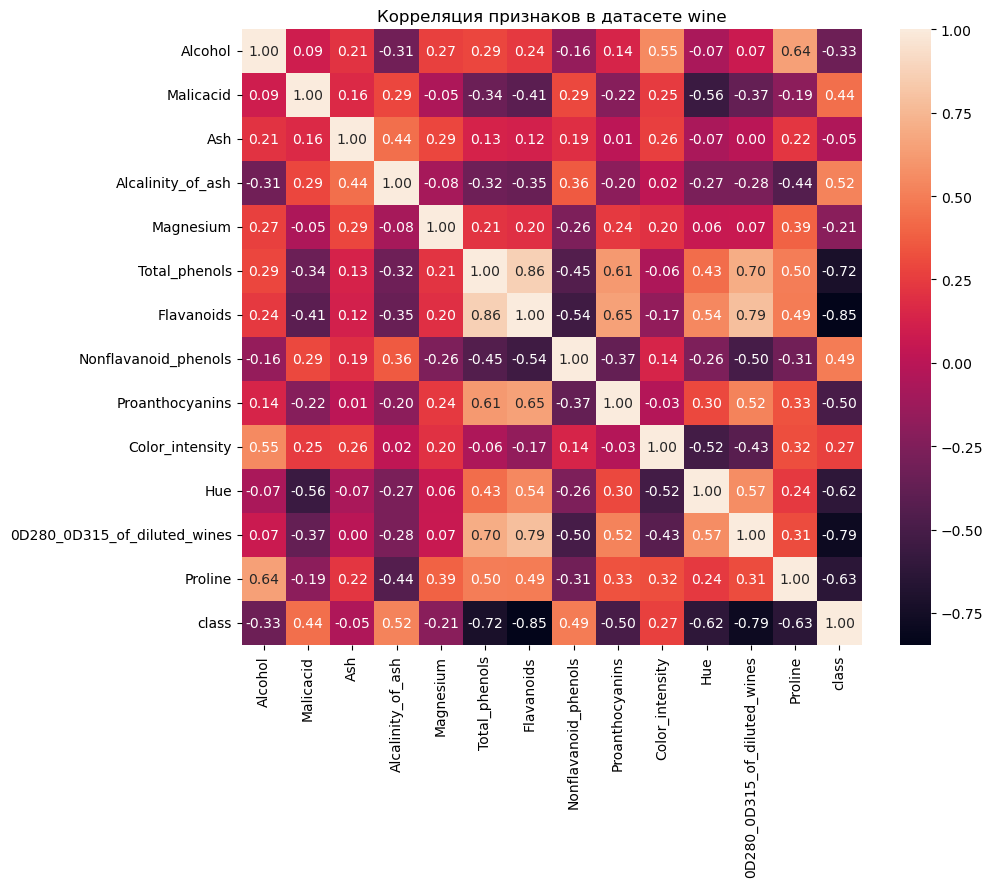

In [32]:
print(wine_with_target.corr())
plt.figure(figsize=(10, 8))
sns.heatmap(wine_with_target.corr(), annot=True, fmt=".2f")
plt.title("Корреляция признаков в датасете wine")
plt.show()

distributions for all numeric variables 

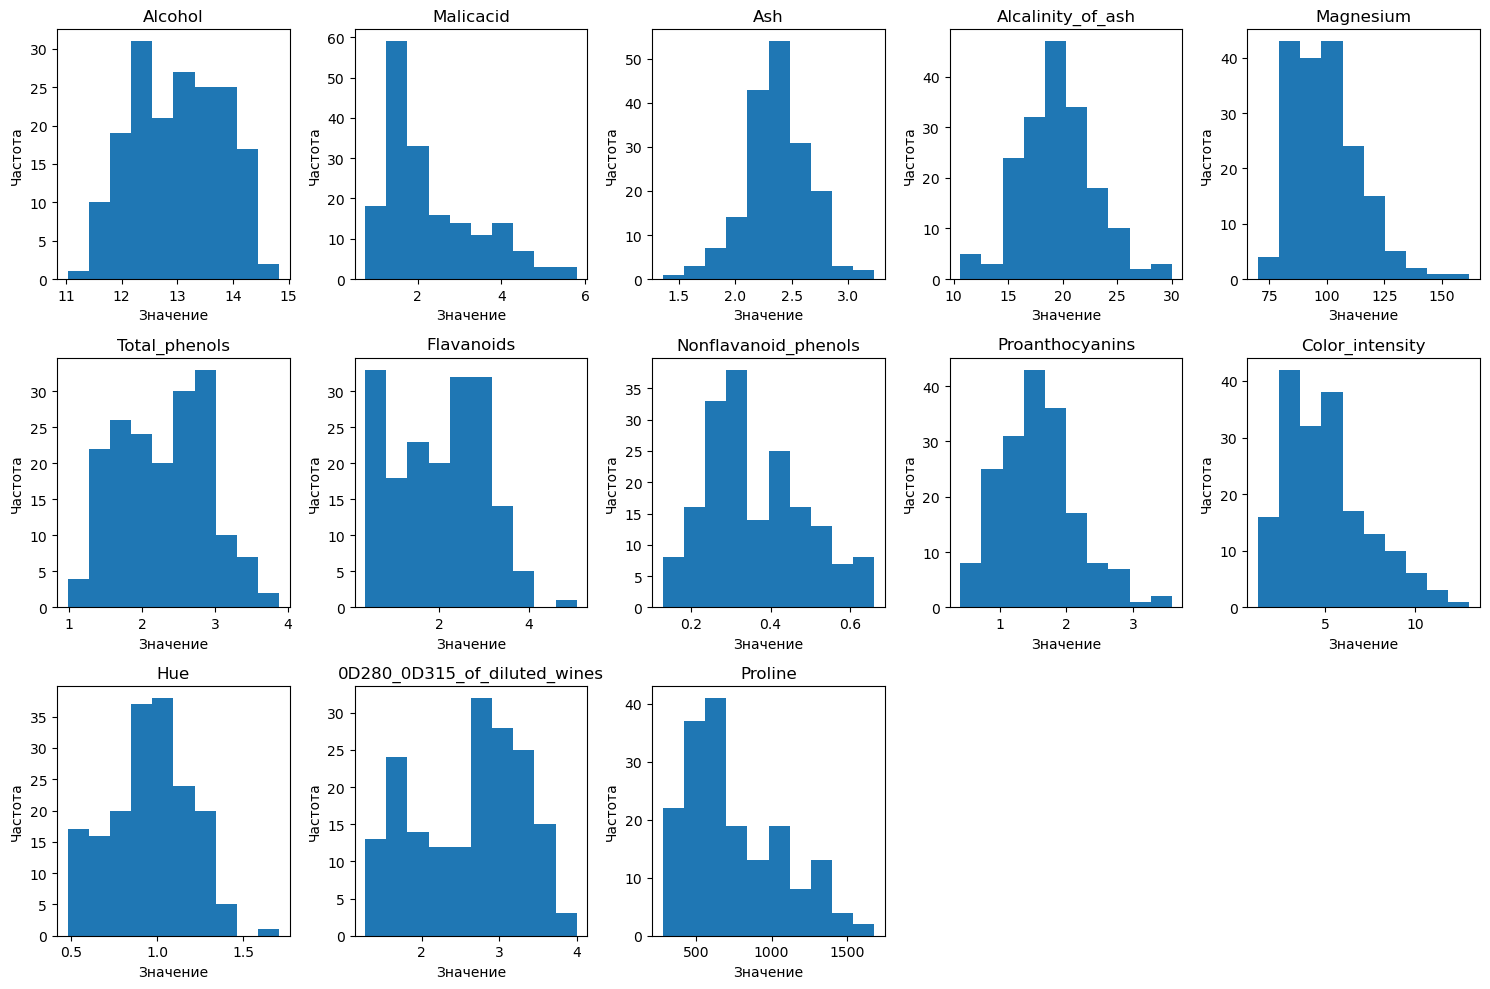

In [8]:
plt.figure(figsize=(15, 10))

# Проход по каждому столбцу DataFrame
for i, column in enumerate(wine_df.columns):

    plt.subplot(3, 5, i+1)  
    plt.hist(wine_df[column])
    plt.title(column)
    plt.xlabel("Значение")
    plt.ylabel("Частота")


plt.tight_layout() # Расположение подграфиков
plt.show()

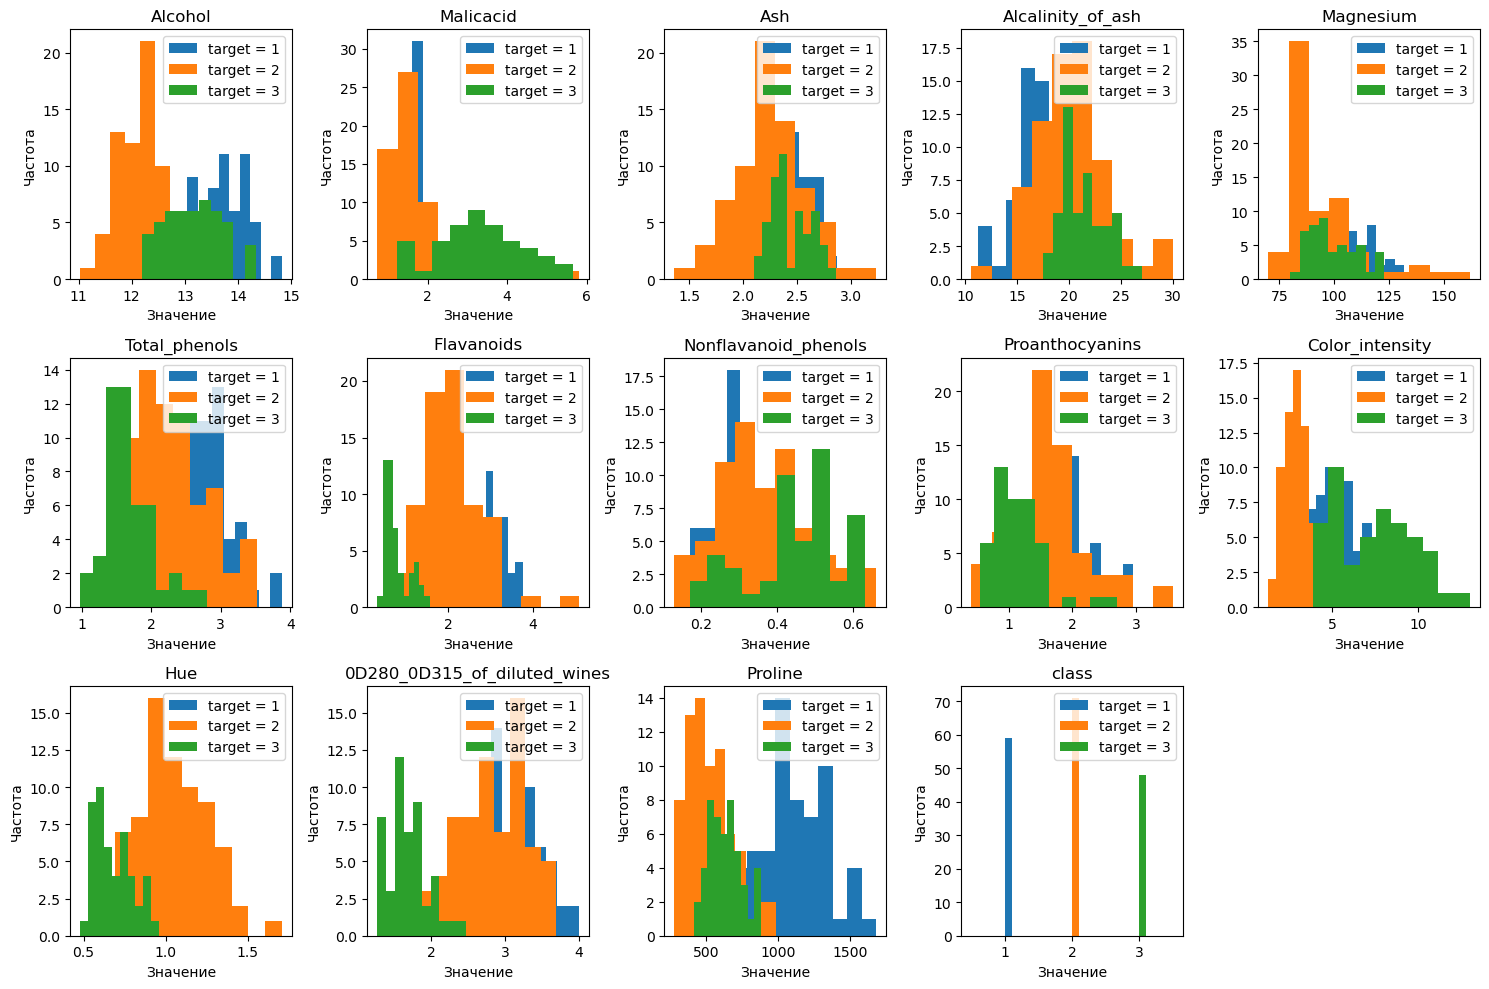

In [6]:
plt.figure(figsize=(15, 10))

# Проход по каждому столбцу DataFrame
for i, column in enumerate(wine_with_target.columns):

    for k in range(1,4):
        plt.subplot(3, 5, i+1)  
        plt.hist(wine_with_target.loc[wine_with_target['class'] == k][column], label = f"target = {k}")
        plt.legend()
        plt.title(column)
        plt.xlabel("Значение")
        plt.ylabel("Частота")


plt.tight_layout() # Расположение подграфиков
plt.show()

Разбить данные на test и train

In [34]:
X = wine_df  # Признаки
y = target_df  # Целевая переменная

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

5 задание 
Обучить decision tree на 2х самых коррелирующих признаках и не коррелирующих признаках, используя gini. Посмотреть метрики(f1 score,accuracy,precision,recall), сделать выводы, построить ConfusionMatrix  

In [35]:
X_selected = wine_df[['Total_phenols','Flavanoids']]
y = target_df
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42) # Разделение данных на обучающий и тестовый наборы

# Обучение модели Decision Tree
clf = DecisionTreeClassifier(criterion='gini', random_state=42)
clf.fit(X_train, y_train)

# Предсказание на тестовом наборе
y_pred = clf.predict(X_test)

# Вычисление метрик
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average=None)
recall = recall_score(y_test, y_pred, average=None)
f1 = f1_score(y_test, y_pred, average=None)

# Вывод метрик
print("Метрики:")
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

# Построение Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:")
print(conf_matrix)

Метрики:
Accuracy: 0.75
Precision: [0.78571429 0.66666667 0.85714286]
Recall: [0.78571429 0.71428571 0.75      ]
F1 Score: [0.78571429 0.68965517 0.8       ]

Confusion Matrix:
[[11  3  0]
 [ 3 10  1]
 [ 0  2  6]]


In [36]:
# Разделение данных на обучающий и тестовый наборы
X_selected = wine_df[['Ash','Proanthocyanins']]
y = target_df
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=None)

# Обучение модели Decision Tree
clf = DecisionTreeClassifier(criterion='gini', random_state=42)
clf.fit(X_train, y_train)

# Предсказание на тестовом наборе
y_pred = clf.predict(X_test)

# Вычисление метрик
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average=None)
recall = recall_score(y_test, y_pred, average=None)
f1 = f1_score(y_test, y_pred, average=None)

# Вывод метрик
print("Метрики:")
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

# Построение Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:")
print(conf_matrix)

Метрики:
Accuracy: 0.5277777777777778
Precision: [0.4        0.5        0.66666667]
Recall: [0.36363636 0.58333333 0.61538462]
F1 Score: [0.38095238 0.53846154 0.64      ]

Confusion Matrix:
[[4 6 1]
 [2 7 3]
 [4 1 8]]


6.	Обучить на выбор (SVM, XGboost,RandomForest), на всех признаках. Получить результат, отобразить метрики как в пункте 5, в случае обучения методов использующих деревья отразить важность признаков 

In [11]:
X_selected = wine_df
y = target_df
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=None)
svm_model = SVC(kernel='linear')
svm_model.fit(X_train, y_train.values.ravel())

svm_pred = svm_model.predict(X_test)

svm_accuracy = accuracy_score(y_test, svm_pred)
svm_precision = precision_score(y_test, svm_pred, average=None)
svm_recall = recall_score(y_test, svm_pred, average=None)
svm_f1 = f1_score(y_test, svm_pred, average=None)

print("Метрики для SVM:")
print("Accuracy:", svm_accuracy)
print("Precision:", svm_precision)
print("Recall:", svm_recall)
print("F1 Score:", svm_f1)

Метрики для SVM:
Accuracy: 0.9722222222222222
Precision: [1.         0.92857143 1.        ]
Recall: [1.         1.         0.85714286]
F1 Score: [1.         0.96296296 0.92307692]


обучение на деревьях 

In [12]:
rf_model = RandomForestClassifier(random_state=None)
rf_model.fit(X_train, y_train.values.ravel())

# Предсказание на тестовом наборе
rf_pred = rf_model.predict(X_test)

# Оценка модели RandomForest
rf_accuracy = accuracy_score(y_test, rf_pred)
rf_precision = precision_score(y_test, rf_pred, average=None)
rf_recall = recall_score(y_test, rf_pred, average=None)
rf_f1 = f1_score(y_test, rf_pred, average=None)

print("\nМетрики для RandomForest:")
print("Accuracy:", rf_accuracy)
print("Precision:", rf_precision)
print("Recall:", rf_recall)
print("F1 Score:", rf_f1)


Метрики для RandomForest:
Accuracy: 1.0
Precision: [1. 1. 1.]
Recall: [1. 1. 1.]
F1 Score: [1. 1. 1.]


<AxesSubplot:>

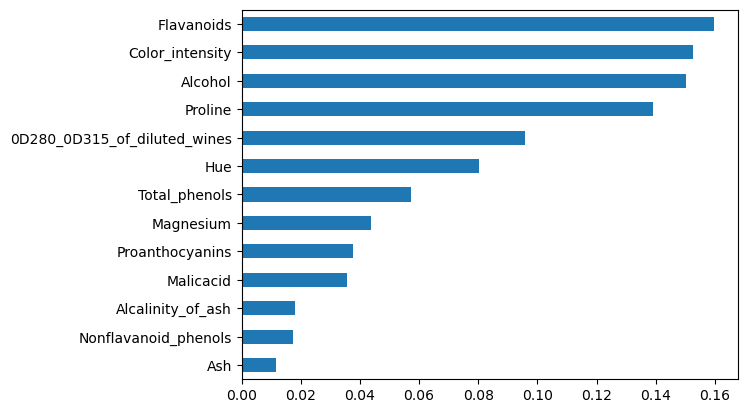

In [53]:
pd.Series(rf_model.feature_importances_,rf_model.feature_names_in_).sort_values().plot.barh()

7.	Построить график roc curve

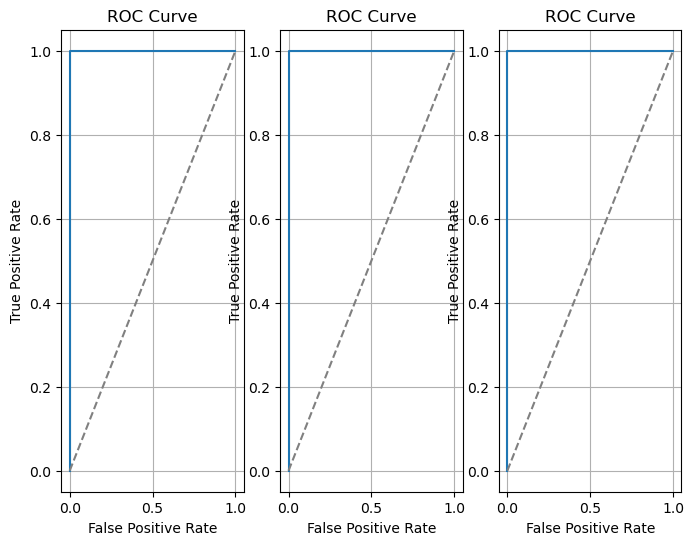

In [17]:
# X_selected = wine_df
# y = target_df
# X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=None)

plt.figure(figsize=(8, 6))

for k in range(3):    
    rf_probs = rf_model.predict_proba(X_test)[:, k]

    # Вычисление ROC Curve
    rf_fpr, rf_tpr, _ = roc_curve(y_test, rf_probs,pos_label=(k+1))

    plt.subplot(1, 3, k+1)  
    plt.plot(rf_fpr, rf_tpr, linestyle='-', label=f'RandomForest {k}')
    plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random Guessing')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.grid(True)

plt.show()